In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing datasets
travel_train = pd.read_csv('Traveldata_train.csv')
survey_train = pd.read_csv('Surveydata_train.csv')
travel_test = pd.read_csv('Traveldata_test.csv')
survey_test = pd.read_csv('Surveydata_test.csv')

In [3]:
travel_train.head()


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [4]:
survey_train.head()


,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [5]:
#merging two dataset into one
train_df = travel_train.merge(survey_train, on = 'ID')
test_df = travel_test.merge(survey_test, on = 'ID')

In [6]:
#arranging train_df columns
train_col = train_df.columns.tolist()
train_col = ['ID',
 'Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Travel_Class',
 'Travel_Distance',
 'Departure_Delay_in_Mins',
 'Arrival_Delay_in_Mins',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding',
 'Overall_Experience']
train_df = train_df[train_col]

In [7]:
#arranging test df columns
test_df['Overall_Experience'] = 'a'
test_col = test_df.columns.tolist()
test_col

['ID',
 'Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Travel_Class',
 'Travel_Distance',
 'Departure_Delay_in_Mins',
 'Arrival_Delay_in_Mins',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding',
 'Overall_Experience']

In [8]:
#concating  training and testing set
df = pd.concat([train_df, test_df])

In [9]:
df.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Overall_Experience
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,Needs Improvement,...,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable,a
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,Needs Improvement,...,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good,a
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,Good,...,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement,a
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,Excellent,...,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good,a
35601,99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0,Good,...,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor,a


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129981 entries, 0 to 35601
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129981 non-null  int64  
 1   Gender                   129874 non-null  object 
 2   Customer_Type            117647 non-null  object 
 3   Age                      129937 non-null  float64
 4   Type_Travel              117307 non-null  object 
 5   Travel_Class             129981 non-null  object 
 6   Travel_Distance          129981 non-null  int64  
 7   Departure_Delay_in_Mins  129895 non-null  float64
 8   Arrival_Delay_in_Mins    129501 non-null  float64
 9   Seat_Comfort             129898 non-null  object 
 10  Seat_Class               129981 non-null  object 
 11  Arrival_Time_Convenient  117726 non-null  object 
 12  Catering                 117883 non-null  object 
 13  Platform_Location        129939 non-null  object 
 14  Onboa

In [11]:
#converting object datatype into categorical
cat_columns = df.select_dtypes('object').columns.tolist()
cat_columns.remove('Overall_Experience')
for i in cat_columns:
    df[i] = df[i].astype('category')

In [12]:
df.dtypes

ID                            int64
Gender                     category
Customer_Type              category
Age                         float64
Type_Travel                category
Travel_Class               category
Travel_Distance               int64
Departure_Delay_in_Mins     float64
Arrival_Delay_in_Mins       float64
Seat_Comfort               category
Seat_Class                 category
Arrival_Time_Convenient    category
Catering                   category
Platform_Location          category
Onboard_Wifi_Service       category
Onboard_Entertainment      category
Online_Support             category
Ease_of_Online_Booking     category
Onboard_Service            category
Legroom                    category
Baggage_Handling           category
CheckIn_Service            category
Cleanliness                category
Online_Boarding            category
Overall_Experience           object
dtype: object

In [13]:
#analyze summary statistics
df.describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,1.299810e+05,129937.000000,129981.000000,129895.000000,129501.000000
mean,9.914043e+07,39.427138,1981.151591,14.711067,15.088393
std,4.780451e+05,15.122312,1026.964654,38.072295,38.464694
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.883250e+07,27.000000,1359.000000,0.000000,0.000000
50%,9.886499e+07,40.000000,1924.000000,0.000000,0.000000
75%,9.990311e+07,51.000000,2543.000000,12.000000,13.000000
max,9.993560e+07,85.000000,6951.000000,1592.000000,1584.000000


In [14]:
df.describe(include = 'category')

,Gender,Customer_Type,Type_Travel,Travel_Class,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
count,129874,117647,117307,129981,129898,129981,117726,117883,129939,129939,129955,129864,129890,119508,129866,129799,129882,129973,129973
unique,2,2,2,2,6,2,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business Travel,Eco,Acceptable,Green Car,Good,Acceptable,Manageable,Good,Good,Good,Good,Good,Good,Good,Good,Good,Good
freq,65884,96172,80930,67815,29161,65177,26935,25601,33537,31578,41882,41503,39934,37487,39712,48235,36484,48848,35213


In [15]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=np.quantile(df[col], 0.25) # 25th quantile
    Q3=np.quantile(df[col], 0.75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [16]:
df_raw = df.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

In [17]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [18]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

In [19]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
df[num_data.columns] = df[num_data.columns].fillna(df[num_data.columns].median())

# Fill object columns with model.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [20]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
cat_col = df.select_dtypes('category').columns.tolist()
# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
dfx = pd.get_dummies(data = df, columns = cat_col, drop_first = True)

test_df = dfx.loc[df['Overall_Experience'] == 'a']
test_id = test_df['ID']
test_df = test_df.drop(columns = ['Overall_Experience', 'ID'], axis = 1)



X = dfx.loc[dfx['Overall_Experience'] != 'a']
y = X.Overall_Experience.astype('category')

X = X.drop(columns = ['Overall_Experience', 'ID'], axis = 1)



In [21]:
# Split the data into training and test set

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [22]:
y.value_counts()

1    51593
0    42786
Name: Overall_Experience, dtype: int64

In [23]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [105]:
# Defining the Logistic regression model
lg = LogisticRegression()
# Fitting the model on the training data 

lg.fit(x_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     29950
           1       0.85      0.86      0.85     36115

    accuracy                           0.84     66065
   macro avg       0.84      0.84      0.84     66065
weighted avg       0.84      0.84      0.84     66065



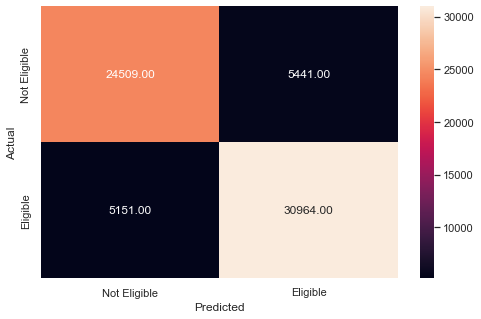

In [106]:
#Predict for train set
y_pred_train = lg.predict(x_train)
#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     12836
           1       0.86      0.86      0.86     15478

    accuracy                           0.84     28314
   macro avg       0.84      0.84      0.84     28314
weighted avg       0.84      0.84      0.84     28314



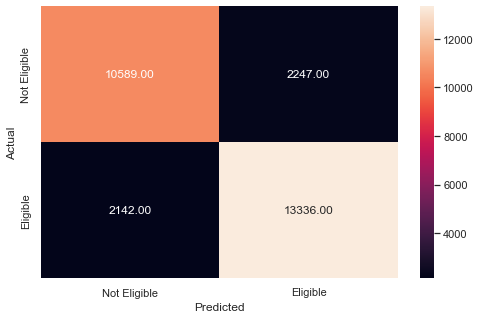

In [107]:
#Predict for test set

y_pred_test = lg.predict(x_test)

#checking the performance on the test dataset

metrics_score(y_test, y_pred_test)

In [108]:
# Printing the coefficients of logistic regression
cols = X.columns
coef_lg = lg.coef_
pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
Onboard_Entertainment_Excellent,0.989290
Seat_Comfort_Excellent,0.674768
Onboard_Entertainment_Good,0.534731
Online_Support_Excellent,0.530812
Customer_Type_Loyal Customer,0.484335
...,...
Ease_of_Online_Booking_Poor,-0.327540
Seat_Comfort_Needs Improvement,-0.400326
Onboard_Entertainment_Needs Improvement,-0.542156
Gender_Male,-0.597299


In [109]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}

dt = DecisionTreeClassifier(class_weight = {0: 0.5, 1: 0.5}, random_state = 1)

In [110]:
#fitting Decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



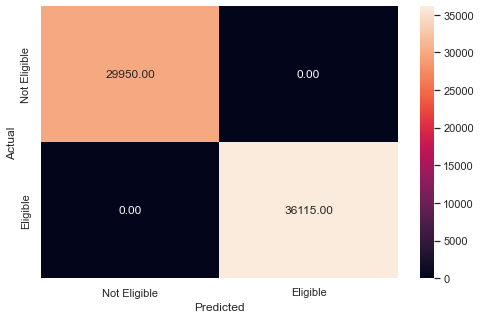

In [111]:
# Checking performance on the training data
y_pred_train_dt = dt.predict(x_train)
metrics_score(y_train, y_pred_train_dt)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     12836
           1       0.93      0.94      0.94     15478

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



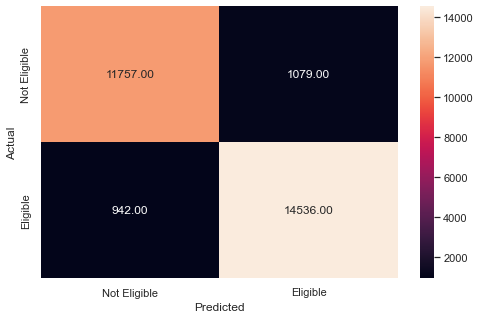

In [112]:
# Checking performance on the testing data
y_pred_test_dt = dt.predict(x_test)
metrics_score(y_test, y_pred_test_dt)

In [113]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.5, 1: 0.5}, random_state = 1)


# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)


# Fit the GridSearch on train dataset
gridCV = gridCV.fit(x_train, y_train)


# Set the clf to the best combination of parameters
dtree_estimator = gridCV.best_estimator_


# Fit the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=5, min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     29950
           1       0.87      0.89      0.88     36115

    accuracy                           0.87     66065
   macro avg       0.87      0.86      0.87     66065
weighted avg       0.87      0.87      0.87     66065



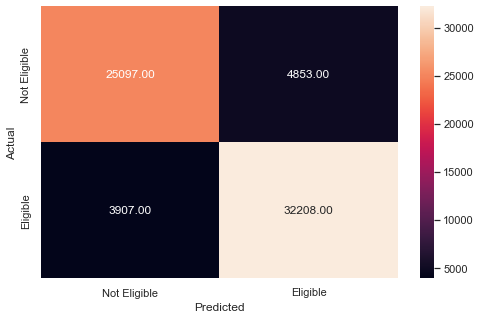

In [114]:
# Checking performance on the training data based on the tuned model
y_train_pred_est = dtree_estimator.predict(x_train)
metrics_score(y_train, y_train_pred_est)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     12836
           1       0.86      0.89      0.88     15478

    accuracy                           0.86     28314
   macro avg       0.86      0.86      0.86     28314
weighted avg       0.86      0.86      0.86     28314



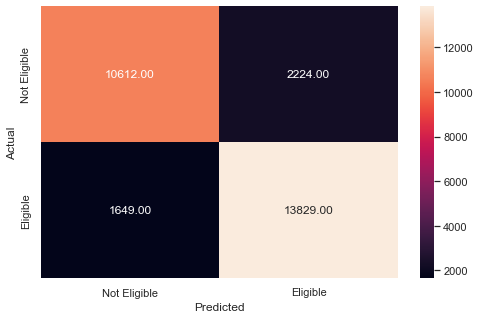

In [115]:
# Checking performance on the testing data based on the tuned model
y_test_pred_est = dtree_estimator.predict(x_test)
metrics_score(y_test, y_test_pred_est)

In [117]:
# Defining Random forest CLassifier
rf_estimator = RandomForestClassifier(class_weight = {0: 0.5, 1: 0.5}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



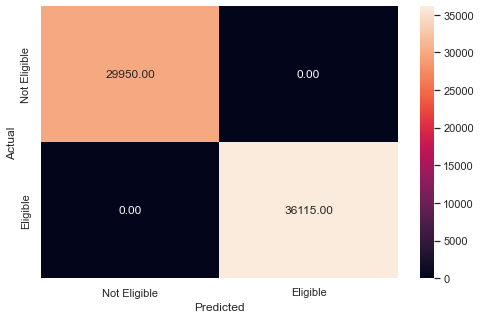

In [118]:
#Checking performance on the training data
y_train_pred_rf = rf_estimator.predict(x_train)
metrics_score(y_train, y_train_pred_rf)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12836
           1       0.96      0.94      0.95     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



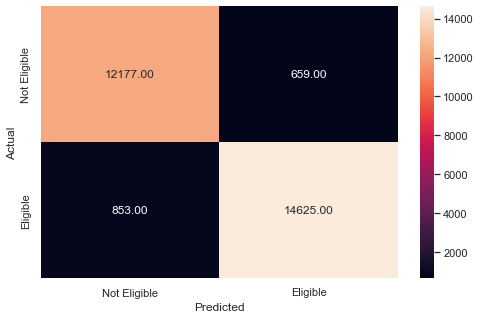

In [119]:
# Checking performance on the test data

y_test_pred_rf = rf_estimator.predict(x_test)
metrics_score(y_test, y_test_pred_rf)

In [120]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.55, 1: 0.45}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500,650],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.6, 0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_


# Fitting Random Forest model
rf_estimator_tuned.fit(x_train, y_train)



RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, max_features=0.7,
                       n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



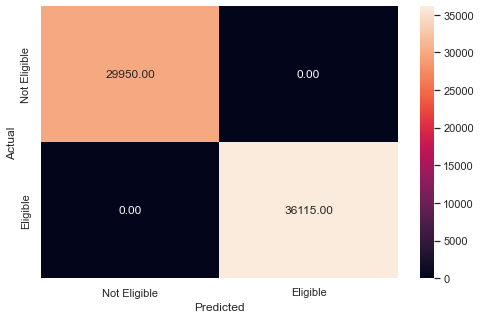

In [121]:
# Checking performance on the train data
y_train_rf_tuned = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_train_rf_tuned)


              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12836
           1       0.96      0.95      0.96     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



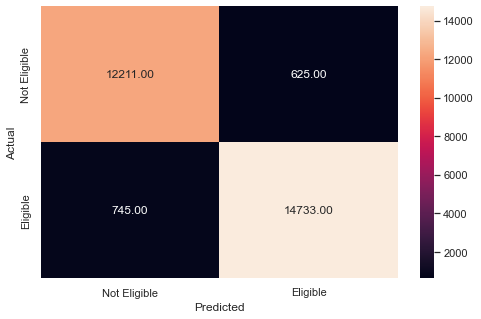

In [122]:
# Checking performance on the test data
y_test_rf_tuned = rf_estimator_tuned.predict(x_test)
metrics_score(y_test, y_test_rf_tuned)


In [133]:
test_y = rf_estimator_tuned.predict(test_df)
test_y_df=pd.DataFrame(test_y, columns=['Overall_Experience']) 
test_id_df = pd.DataFrame(test_id)


In [136]:
merged1 = test_id_df.merge(test_y_df, left_index = True, right_index = True)

In [137]:
merged1.head()

,ID,Overall_Experience
0,99900001,1
1,99900002,1
2,99900003,1
3,99900004,0
4,99900005,1


In [139]:
merged1['Overall_Experience'].value_counts()

1    19235
0    16367
Name: Overall_Experience, dtype: int64

In [142]:
merged1.to_csv('hackathon_sub_1.csv', index = False)

In [143]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
# Choose the type of classifier
rf_estimator_tuned2 = RandomForestClassifier(class_weight = {0: 0.55, 1: 0.45}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500,650],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.6, 0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned2 = grid_obj.best_estimator_


# Fitting Random Forest model
rf_estimator_tuned2.fit(x_train, y_train)



RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, max_features=0.6,
                       n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



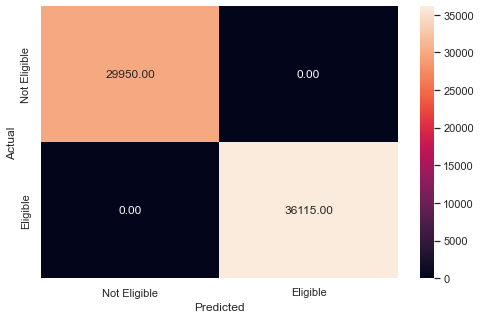

In [144]:
# Checking performance on the training data
y_train_rf_tuned2 = rf_estimator_tuned2.predict(x_train)
metrics_score(y_train, y_train_rf_tuned2)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12836
           1       0.96      0.95      0.96     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



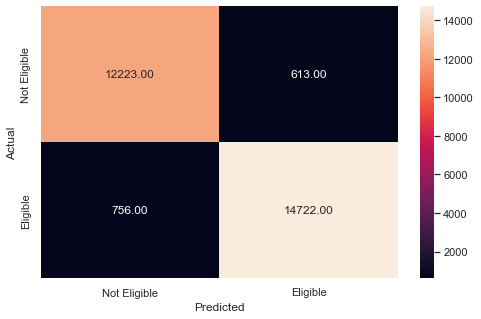

In [145]:
# Checking performace on test dataset
y_test_rf_tuned2 = rf_estimator_tuned2.predict(x_test)
metrics_score(y_test, y_test_rf_tuned2)

In [146]:
test_y2 = rf_estimator_tuned2.predict(test_df)
test_y_df2=pd.DataFrame(test_y2, columns=['Overall_Experience']) 
test_id_df2 = pd.DataFrame(test_id)


In [147]:
merged2 = test_id_df2.merge(test_y_df2, left_index = True, right_index = True)

In [148]:
merged2.to_csv('hackathon_sub_2.csv', index = False)

In [25]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
# Choose the type of classifier
rf_estimator_tuned3 = RandomForestClassifier(class_weight = {0: 0.55, 1: 0.45}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [650],
        "min_samples_leaf": np.arange(1, 6, 1),
        "max_features": [0.5, 0.6, 0.7],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned3, params_rf, scoring = scorer, cv = 5, n_jobs = -1)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned3 = grid_obj.best_estimator_


# Fitting Random Forest model
rf_estimator_tuned3.fit(x_train, y_train)


RandomForestClassifier(class_weight={0: 0.55, 1: 0.45}, max_features=0.5,
                       n_estimators=650, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12836
           1       0.96      0.95      0.96     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



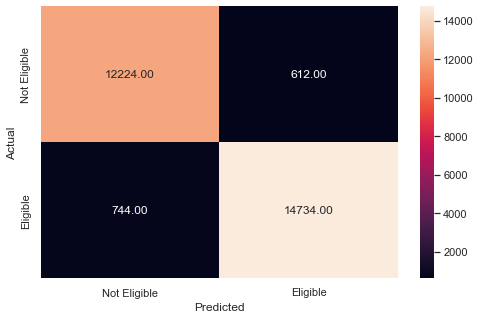

In [26]:
# Checking performace on test dataset
y_test_rf_tuned3 = rf_estimator_tuned3.predict(x_test)
metrics_score(y_test, y_test_rf_tuned3)